> Many Kinds of Layers
A "layer" in Keras is a very general kind of thing. A layer can be, essentially, any kind of data transformation. Many layers, like the convolutional and recurrent layers, transform data through use of neurons and differ primarily in the pattern of connections they form. Others though are used for feature engineering or just simple arithmetic. There's a whole world of layers to discover -- check them out!

## Inorudction to to Tensor Flow

Core component of Tensor flow API are: 

- **Layers** `tf.keras.layers.Layer` class. A Layer encapsulates a *state* (weights) and some computation
    - layers are "recursively composable"
    - layers can be used to handle data preprocessing tasks like normalization or test vectorization; 
- **Model** 
    - sequential is just the simplest form
    - this let you build arbitrary graph of layers;
    - flow with other generic ML process such as
        - `tf.keras.Model.fit`
        - `tf.keras.Model.evaluate`
        - `tf.keras.Model.compile`
    - *Callbacks*: This basically let you use early stoping, model checkpointing
    - *Distributed Training* : Scale up to multiple GPU and TPUs devices


Kera's function is written based on concept `layers` and `activation function`. You stack them up as python list

Kera optimise this data by 

![concept](img/Screenshot%202023-07-23%20at%2023.27.04.png)


In [4]:
# syntax of looks like this: 
from tensorflow import keras 
from tensorflow.keras import layers # layers module
# create a network with 1 linear unit
model = keras.Sequential([ # sequential is the simplist type
    layers.Dense(units=1, input_shape=[3]) # 3 for number of features (neuro)
    # accroding to documentation Dense is Layer class
])

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
abalone = pd.read_csv("data/abalone.csv")
abalone.columns
abalone.describe()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
from sklearn import preprocessing
X = abalone.iloc[:,0:7]
#pd.value_counts(abalone.iloc[:,0])

In [53]:
preprocessing.OrdinalEncoder().fit_transform(X.iloc[:,0:1]) # needs 2-d array

array([[2.],
       [2.],
       [0.],
       ...,
       [2.],
       [0.],
       [2.]])

In [167]:
from sklearn.pipeline import Pipeline
preprocessing.OneHotEncoder().fit_transform(X)

<4177x5126 sparse matrix of type '<class 'numpy.float64'>'
	with 37593 stored elements in Compressed Sparse Row format>

Virtually all of the optimization algorithms used in deep learning belong to a family called **Stochastic Gradient Descent**. 

Training Process is Eventually Such as: 

- sample some traning data and run it through network to make prediction
- measure loss between prediction and true values
- adjust weight in a direction that make the loss smaller

Each iteration is called **minibatch** (sample size). Complete round of tranin data is **epoch**; The number of epochs you train for is how many times the network will see each training example.

**Width** Vs **Depth**
Wider easier learning linear relationshhips; 
Deeper is good for more linear relationship;

**Early Stoping**: run after erey eposch

```py
from tensorflow.keras import layers, callbacks
callbacks.EarlyStopping(
    min_delta # minimum amount of change
    patience # how many epochs to wait
    restore_best_weights
)
```

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
from sklearn.model_selection import train_test_split

transformer = ColumnTransformer(
    [
     ("encode_categorical", preprocessing.OneHotEncoder(),["Type"]),
     ("mean_imputer", SimpleImputer(strategy = 'mean'), slice(1,7))
     ],
     verbose_feature_names_out = True
)

X = abalone.iloc[:,0:8].copy()
y = abalone.iloc[:,8].copy()
X = transformer.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4)

In [9]:
transformer.get_feature_names_out()
X_labeled=pd.DataFrame(
    X_train,
    columns=[*transformer.get_feature_names_out()]
)
X_labeled.head(4)

,encode_categorical__Type_F,encode_categorical__Type_I,encode_categorical__Type_M,mean_imputer__LongestShell,mean_imputer__Diameter,mean_imputer__Height,mean_imputer__WholeWeight,mean_imputer__ShuckedWeight,mean_imputer__VisceraWeight
0,0.0,0.0,1.0,0.505,0.395,0.135,0.5915,0.2880,0.1315
1,0.0,0.0,1.0,0.650,0.525,0.175,1.5365,0.6865,0.3585
2,0.0,1.0,0.0,0.505,0.385,0.120,0.6005,0.2390,0.1420
3,0.0,1.0,0.0,0.540,0.415,0.135,0.7090,0.3195,0.1740


In [10]:
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)
neuroModel = keras.Sequential([
    layers.Dense(36, activation = 'relu', input_shape=[9]),
    layers.Dense(36, activation = 'relu'),
    layers.Dense(1)
])
neuroModel.compile(
    optimizer=keras.optimizers.legacy.Adam(), # Adam algorithmn
    loss='mae'
)
history = neuroModel.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 256,
    epochs = 100,
    verbose=0,
    callbacks=[early_stopping] # remember this is a list     
)

Adam is a *stochastic gradient descent* method is considered computationally efficient.

<Axes: >

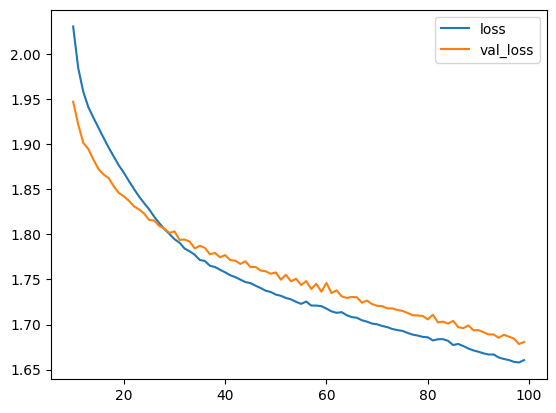

In [11]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:,['loss','val_loss']]\
    .iloc[10:]\
    .plot()

### Batch Normalisation & Dropout Layers

spotify data is relatively normalised
the concrate one is not


Dropout layer prevent overfitting 
Batch Normalisation make things possible

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('data/spotify.csv')
X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)
# make sure each artist is evenly splited
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]

In [13]:
standard_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    #layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    layers.Dense(1)
])
standard_model.compile(
    optimizer='adam',
    loss='mae',
)
history_1 = standard_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)
history_df_1 = pd.DataFrame(history_1.history)

In [1]:
# following code add Batch Normalisation into it
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)
history_df = pd.DataFrame(history.history)

NameError: name 'keras' is not defined

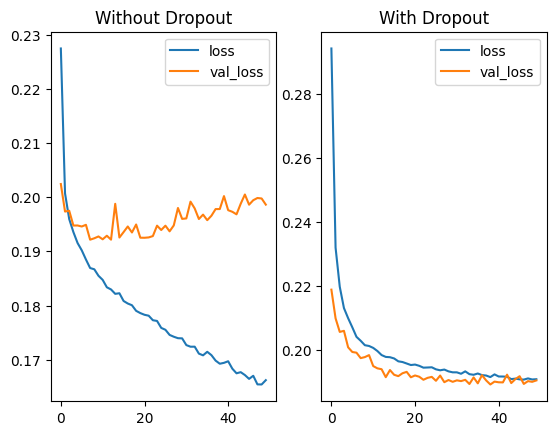

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, )
history_df_1.plot(ax=ax1)
history_df.plot(ax=ax2)
ax1.title.set_text("Without Dropout")
ax2.title.set_text("With Dropout")

In [1]:
# concrete data
concrete = pd.read_csv('data/concrete.csv')
df = concrete.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

input_shape = [X_train.shape[1]]

NameError: name 'pd' is not defined

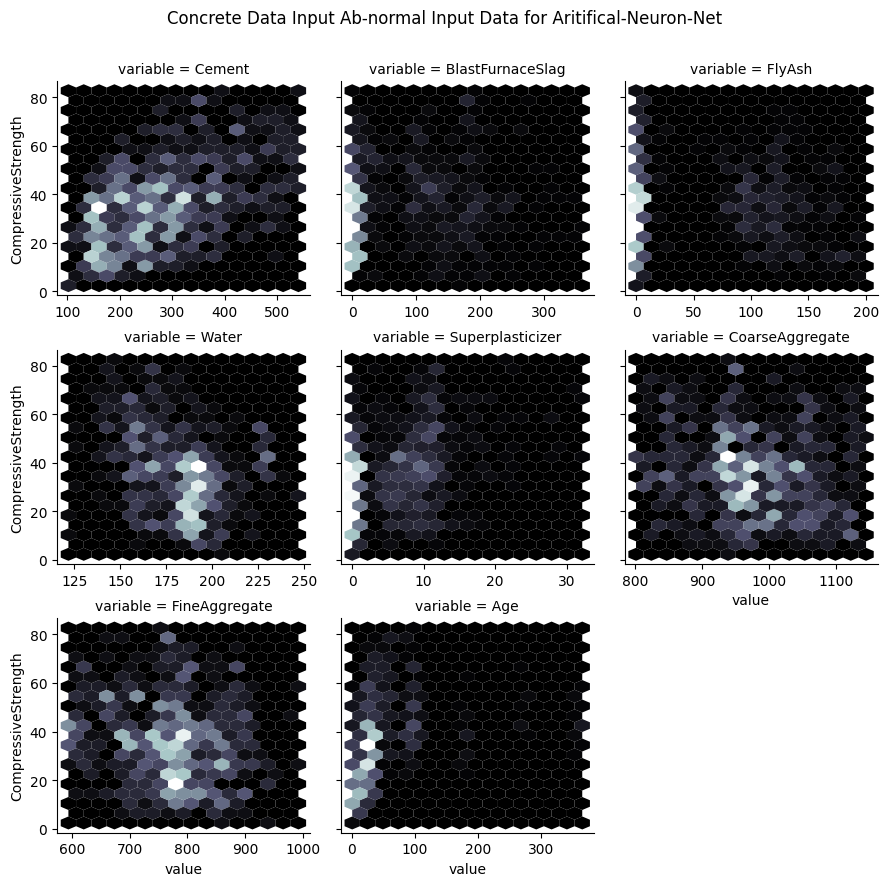

In [20]:
tmp = X_train.melt(ignore_index = False).join(y_train)
g = sns.FacetGrid(
    tmp, col = 'variable', sharex=False, col_wrap = 3
)
g.map(plt.hexbin, 'value', 'CompressiveStrength', 
      linewidths = 0, edgecolors = 'face',
      gridsize=(15, 10),cmap = 'bone')
g.figure.suptitle('Concrete Data Input Ab-normal Input Data for Aritifical-Neuron-Net')
g.figure.subplots_adjust(top=0.9)

Minimum Validation Loss: nan


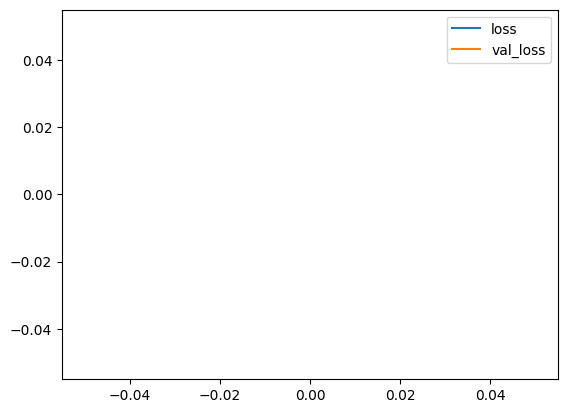

In [21]:
# this code will end up with empty grrph 
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),    
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
    loss='mae',
    metrics=['mae'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Unormalised data typically will result in blank lose function. Detailed math function can be explained later.

In [22]:
# model with batch normalisation
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])  